In [561]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## 0.0 Data Collection Process

In [554]:
# import data and scheme data
df = pd.read_csv("survey_results_public.csv")
df_scheme = pd.read_csv("survey_results_schema.csv")


## 1.0 Data Understanding Process

In [558]:
# Get Entire data information
df_scheme.to_dict()

{'Column': {0: 'Respondent',
  1: 'MainBranch',
  2: 'Hobbyist',
  3: 'Age',
  4: 'Age1stCode',
  5: 'CompFreq',
  6: 'CompTotal',
  7: 'ConvertedComp',
  8: 'Country',
  9: 'CurrencyDesc',
  10: 'CurrencySymbol',
  11: 'DatabaseDesireNextYear',
  12: 'DatabaseWorkedWith',
  13: 'DevType',
  14: 'EdLevel',
  15: 'Employment',
  16: 'Ethnicity',
  17: 'Gender',
  18: 'JobFactors',
  19: 'JobSat',
  20: 'JobSeek',
  21: 'LanguageDesireNextYear',
  22: 'LanguageWorkedWith',
  23: 'MiscTechDesireNextYear',
  24: 'MiscTechWorkedWith',
  25: 'NEWCollabToolsDesireNextYear',
  26: 'NEWCollabToolsWorkedWith',
  27: 'NEWDevOps',
  28: 'NEWDevOpsImpt',
  29: 'NEWEdImpt',
  30: 'NEWJobHunt',
  31: 'NEWJobHuntResearch',
  32: 'NEWLearn',
  33: 'NEWOffTopic',
  34: 'NEWOnboardGood',
  35: 'NEWOtherComms',
  36: 'NEWOvertime',
  37: 'NEWPurchaseResearch',
  38: 'NEWPurpleLink',
  39: 'NEWSOSites',
  40: 'NEWStuck',
  41: 'OpSys',
  42: 'OrgSize',
  43: 'PlatformDesireNextYear',
  44: 'PlatformWorkedW

In [557]:
# Adding data to tranforme 
str(df_scheme.loc[df_scheme['Column']=='NEWDevOps']['QuestionText'].values[0])

'Does your company have a dedicated DevOps person?'

## 2.0 Question 0 What professonal Developers think about DevOps Importance?

<AxesSubplot:title={'center':'What type of developer is answering?'}, ylabel='MainBranch'>

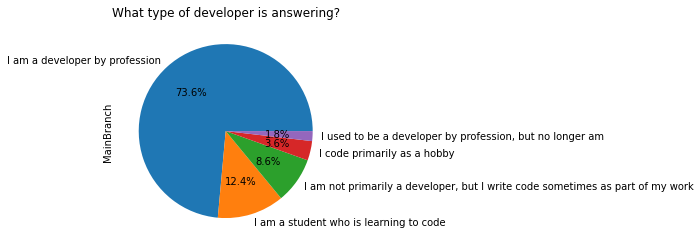

In [560]:
# Question 0: What kind of developer you are?

MainBranch_data = df['MainBranch'].value_counts()

#(MainBranch_data/df.shape[0]).plot(kind='pie',autopct='%1.1f%%')
MainBranch_data.plot(kind='pie',autopct='%1.1f%%',normalize=True, title = 'What type of developer is answering?')


## 2.1 Question 1

<AxesSubplot:title={'center':'DevOps Importance to Prof. Developers'}, ylabel='NEWDevOpsImpt'>

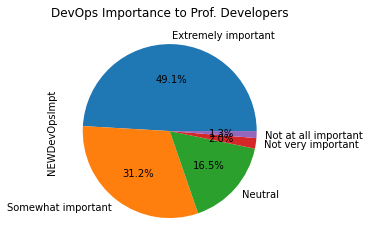

In [520]:
# Question 0.1 What professonal Developers think about DevOps Importance?
MainBranch_Prof_DevOpsImpor = df.loc[df['MainBranch']=='I am a developer by profession']['NEWDevOpsImpt'].value_counts()
MainBranch_Prof_DevOpsImpor.plot(kind='pie',
                                normalize=True, 
                                autopct='%1.1f%%',
                                title='DevOps Importance to Prof. Developers')

## 2.1 Question 2

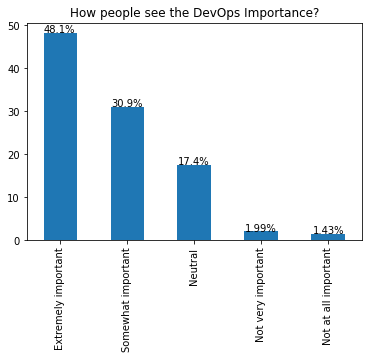

In [521]:

# Question 1 : How the total people asked see the DevOps Impostance
df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_good['NEWDevOpsImpt'].value_counts()/df_good.shape[0]
axes = (df_good['NEWDevOpsImpt'].value_counts()/df_good.shape[0]*100).plot(kind='bar',title='How people see the DevOps Importance?')

for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))


## 2.2 Question 3

Extremely important     829.0
Somewhat important      414.8
Neutral                 229.4
Not very important       23.4
Not at all important     16.2
Name: NEWDevOpsImpt, dtype: float64

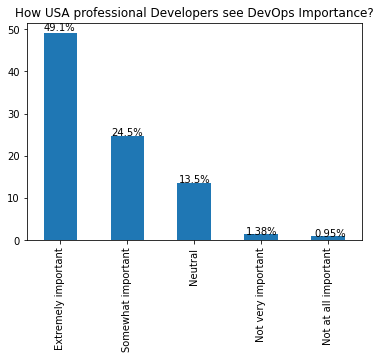

In [550]:
# Question 2 : How the people from USA see DevOps Importance?

df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_us_ = df_good[df_good['Country']=='United States']
df_us_prof = df_us_[df_us_['MainBranch']=='I am a developer by profession']
df_us_val = df_us_prof['NEWDevOpsImpt'].value_counts()


axes = (df_us_val/df_good[df_good['Country']=='United States'].shape[0]*100).plot(kind='bar',title='How USA professional Developers see DevOps Importance?')
for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))


df_us_val/df_us_val.shape[0]

## 2.4 Question 4

In [524]:
# df[(df['Gender']!='Woman') and (df['Gender']!='Man')].value_counts()
D = df.query("Gender != 'Woman' ")
D = D.query("Gender != 'Man'")

D['Gender'].value_counts()

Non-binary, genderqueer, or gender non-conforming              385
Man;Non-binary, genderqueer, or gender non-conforming          121
Woman;Non-binary, genderqueer, or gender non-conforming         92
Woman;Man                                                       76
Woman;Man;Non-binary, genderqueer, or gender non-conforming     26
Name: Gender, dtype: int64

C:\Users\jose.silva\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='NEWDevOpsImpt'>

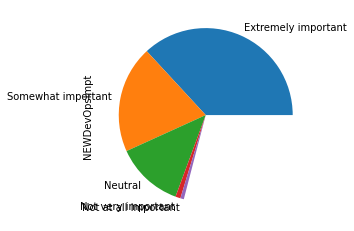

In [548]:
df_1 = df[df['Gender'].isnull()==False]
df_1_w = df_1[df_1['Gender']=='Woman']

(df_1_w['NEWDevOpsImpt'].value_counts()/df_1_w.shape[0]).plot(kind='pie')

<ipython-input-534-b1e46f58781e>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels,rotation='vertical')


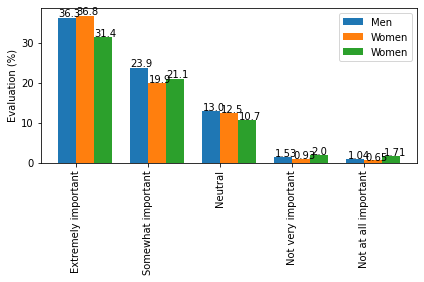

In [534]:

df = df_1.copy()
# Question 3 : How men and women gender influence the DevOpsImpt evaluation on USA ?
df_devops_usa_man = df[df['Gender']=='Man']
df_devops_usa_man['NEWDevOpsImpt'].value_counts()/df_devops_usa_man['NEWDevOpsImpt'].shape[0]


# Question 3 : How men and women gender influence the DevOpsImpt evaluation on USA ?
df_devops_usa_woman = df[df['Gender']=='Woman']
df_devops_usa_woman['NEWDevOpsImpt'].value_counts()/df_devops_usa_woman['NEWDevOpsImpt'].shape[0]

# df_devops_usa_none = df[(df['Gender']!='Woman') or (df['Gender']!='Man')]
# df_devops_usa_none['NEWDevOpsImpt'].value_counts()/df_devops_usa_none['NEWDevOpsImpt'].shape[0]

D = df.query("Gender != 'Woman' ")
df_devops_usa_none = D.query("Gender != 'Man'")


data_man = df_devops_usa_man['NEWDevOpsImpt'].value_counts()/df_devops_usa_man['NEWDevOpsImpt'].shape[0]*100
data_woman = df_devops_usa_woman['NEWDevOpsImpt'].value_counts()/df_devops_usa_woman['NEWDevOpsImpt'].shape[0]*100
data_none = df_devops_usa_none['NEWDevOpsImpt'].value_counts()/df_devops_usa_none['NEWDevOpsImpt'].shape[0]*100



x = np.arange(len(data_man.index.values))  # the label locations
width = 0.25  # the width of the bars

labels = data_man.index.to_list()

fig, axes = plt.subplots()

ax_man = axes.bar(x - width/2 ,data_man.to_list(), width, label = 'Men')
ax_woman = axes.bar(x + width/2 ,data_woman.to_list(), width, label = 'Women')
ax_none = axes.bar(x + 1.5*width/1 ,data_none.to_list(), width, label = 'Women')


for p in axes.patches:
    axes.annotate('{0:.4}'.format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

axes.set_ylabel('Evaluation (%)')
axes.set_xticklabels(labels,rotation='vertical')

axes.set_xticks(x)
axes.set_xticklabels(labels)
axes.legend()
# axes.bar_label(ax_man, padding=3)
# axes.bar_label(ax_woman, padding=3)

fig.tight_layout()


In [399]:
# Question 3 : How men and women gender influence the DevOpsImpt evaluation on USA ?
df_devops_usa_woman = df[df['Gender']=='Woman']
df_devops_usa_woman['NEWDevOpsImpt'].value_counts()/df_devops_usa_woman['NEWDevOpsImpt'].shape[0]

Extremely important     0.368626
Somewhat important      0.199272
Neutral                 0.125650
Not very important      0.009365
Not at all important    0.006504
Name: NEWDevOpsImpt, dtype: float64

In [401]:
# NEWDevOps vs Country
#result_1 = df.groupby('NEWDevOps')['Country'].max()
#print(result_1)

df_country_good = df[df['Country'].isnull() ==False ]
df_country_bad= df[df['Country'].isnull() ==True ]

# N de linhas
df['Country'].count()

# Frequency for values on 'Country'
df['Country'].value_counts().to_dict()

# Frequency 
country_perct = df_country_good['Country'].value_counts()/(df_country_good.shape[0] -sum(df_country_bad['Country'].isnull()))

country_perct

United States                         0.195798
India                                 0.131950
United Kingdom                        0.061178
Germany                               0.061084
Canada                                0.034405
                                        ...   
Marshall Islands                      0.000016
Lesotho                               0.000016
Chad                                  0.000016
Micronesia, Federated States of...    0.000016
Nauru                                 0.000016
Name: Country, Length: 183, dtype: float64

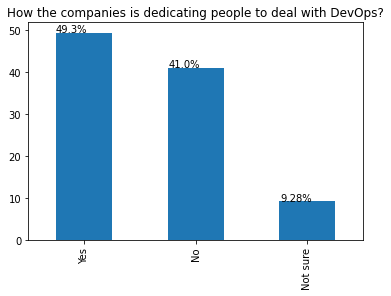

In [559]:

df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_us_ = df_good[df_good['Country']=='United States']
df_us_prof = df_us_[df_us_['MainBranch']=='I am a developer by profession']
df_us_val = df_us_prof['NEWDevOps'].value_counts()

axes = (df_us_prof['NEWDevOps'].value_counts()/df_us_prof['NEWDevOpsImpt'].shape[0]*100).plot.bar(title='How the companies is dedicating people to deal with DevOps?')


#axes = (df['NEWDevOpsImpt'].value_counts()/df['NEWDevOpsImpt'].shape[0]*100).plot.bar(title='How the companies is dedicating people to deal with DevOps?')

for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

